### Predicting Dementia Classification

## 1. Problem definition

> can we predict if a patient has dementia, no dementia, or mild to moderate dementia

## 2. Data

The data came from kaggle https://www.kaggle.com/shashwatwork/dementia-prediction-dataset

## Prepare the tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load data & data manipulation

In [2]:
df = pd.read_csv('dementia_dataset.csv')
df.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


> our target column is `Group`, were going to rename some columns for a better understanding and also remove some unwanted columns.

In [3]:
df.rename(columns={'Group': 'Dementia'}, inplace=True)
df.rename(columns={'M/F': 'Sex'}, inplace=True)
df.head(10)

,Subject ID,MRI ID,Dementia,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


> seeing as how every patient is right handed we can drop that column, also, for this experiment, we don't want to see which specific patient has or doesnt have dementia, so we'll get rid of the ID columns as well

In [4]:
df.drop(columns=['Subject ID', 'MRI ID', 'Hand'], inplace=True)
df.head(10)

,Dementia,Visit,MR Delay,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,Nondemented,1,0,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,2,538,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,1,0,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,Nondemented,2,1010,M,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,Nondemented,3,1603,M,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [5]:
df.isna().sum()

Dementia     0
Visit        0
MR Delay     0
Sex          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

In [6]:
df.SES.unique()

array([ 2., nan,  3.,  4.,  1.,  5.])

In [7]:
df.MMSE.unique()

array([27., 30., 23., 28., 22., 29., 24., 21., 16., 25., 26., 15., 20.,
       19.,  7.,  4., 17., 18., nan])

> we have some missing values
* we can put the most repeating value (mode) for the SES missing values
* we can put the mean for the MMSE missing values

In [8]:
df.SES.fillna(df.SES.mode()[0], inplace=True)
df.MMSE.fillna(df.MMSE.mean(), inplace=True)
df.isna().sum()

Dementia    0
Visit       0
MR Delay    0
Sex         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,373.0,2.436997,1.109307,1.000,2.000,2.000,3.000,5.000
MMSE,373.0,27.342318,3.673329,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Dementia  373 non-null    object 
 1   Visit     373 non-null    int64  
 2   MR Delay  373 non-null    int64  
 3   Sex       373 non-null    object 
 4   Age       373 non-null    int64  
 5   EDUC      373 non-null    int64  
 6   SES       373 non-null    float64
 7   MMSE      373 non-null    float64
 8   CDR       373 non-null    float64
 9   eTIV      373 non-null    int64  
 10  nWBV      373 non-null    float64
 11  ASF       373 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 35.1+ KB


> we have a few datatypes that aren't numbers, we'll convert them into numbers and build a correlation matrix

In [11]:
df.groupby(['Dementia', 'Sex']).size()

Dementia     Sex
Converted    F       24
             M       13
Demented     F       60
             M       86
Nondemented  F      129
             M       61
dtype: int64

* we'll convert the Dementia column as this {'Nondemented': 0, 'Demented': 1, 'Converted': 2}
* we'll convert the Sex column as this {'F': 0, 'M': 1}

In [12]:
df.Dementia.replace({'Nondemented': 0, 'Demented': 1, 'Converted': 2 }, inplace=True)
df.Sex.replace({'F': 0, 'M': 1}, inplace=True)
df.head(10)

,Dementia,Visit,MR Delay,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,3,1895,1,80,12,2.0,22.0,0.5,1698,0.701,1.034
5,0,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,0,2,538,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,0,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,0,2,1010,1,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,0,3,1603,1,85,12,4.0,30.0,0.0,1699,0.705,1.033


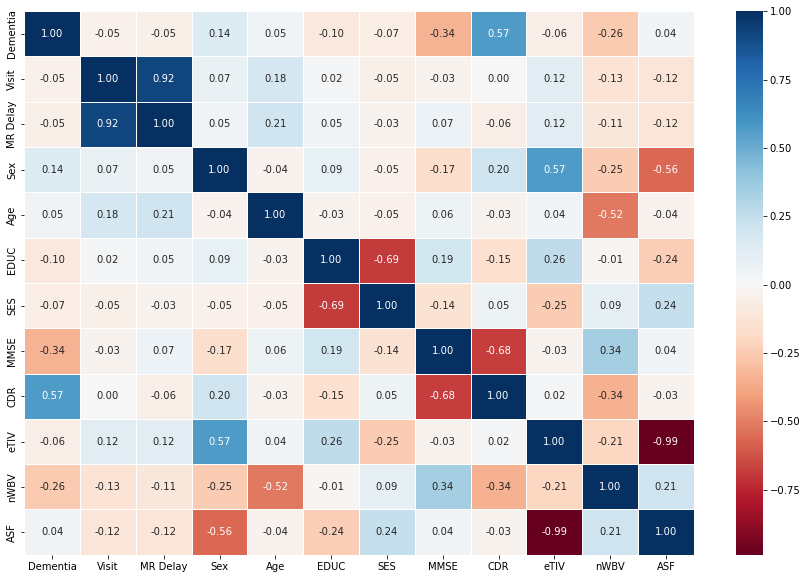

In [13]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='RdBu');

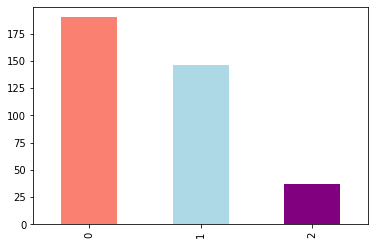

In [14]:
df.Dementia.value_counts().plot(kind='bar', color=['salmon', 'lightblue', 'purple']);

In [15]:
## Lets split our data into X & y
X = df.drop('Dementia', axis=1)
y = df['Dementia']

In [16]:
X

,Visit,MR Delay,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,3,1895,1,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,3,2297,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,2,763,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [17]:
y

0      0
1      0
2      1
3      1
4      1
      ..
368    1
369    1
370    0
371    0
372    0
Name: Dementia, Length: 373, dtype: int64

In [18]:
# split data into training and tests sets
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((298, 11), (75, 11), (298,), (75,))

We'll try 3 different ML models:

* Logistic Regression
* K-Nearest Classifier
* random Forest Classifier

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
# put all models ina dictionary 
# get a baseline score of each with your current data
# create a function to fit and score models

models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boost': GradientBoostingClassifier(),
         'Decision Tree': DecisionTreeClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/Users/artonmirakaj/Desktop/dementia_project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.64,
 'KNN': 0.4533333333333333,
 'Random Forest': 0.8533333333333334,
 'Gradient Boost': 0.8933333333333333,
 'Decision Tree': 0.8133333333333334}

# Model comparison

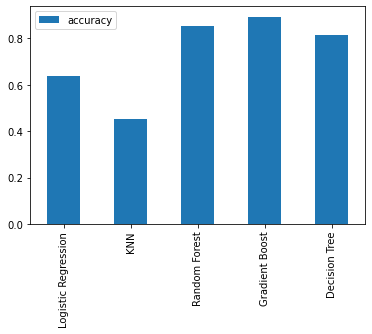

In [26]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

## based on our baseline score of each model

We have a couple models that have a high baseline score that we want to tune the hyperparameters to increase the accuracy

* Random Forest: 85%
* Gradient Boost: 89%

#### Hyperparameter tuning for models
* Use RandomizedSearchCV
* Use GridSearchCV

In [28]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#### Random Forest (RandomizedSearchCV Hyperparameter Tuning)

In [29]:
param_grid = {'n_estimators': np.arange(10, 100, 50),
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

In [30]:
np.random.seed(42)

# tune hyperparameters
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=param_grid,
                          cv=5,
                          n_iter=10,
                          verbose=True)

# fit tunings random forest
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [31]:
rs_rf.best_params_

{'n_estimators': 60, 'min_samples_split': 2, 'min_samples_leaf': 3}

In [32]:
rs_rf.score(X_test, y_test)

0.84

* our original baseline score was 85%
* when we tuned the parameters it went down to 84%

#### Gradient Boosting (RandomizedSearchCV Hyperparameter Tuning)

In [33]:
np.random.seed(42)

rs_gb = RandomizedSearchCV(GradientBoostingClassifier(),
                          param_distributions=param_grid,
                          cv=5,
                          n_iter=10,
                          verbose=True)

rs_gb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [34]:
rs_gb.best_params_

{'n_estimators': 10, 'min_samples_split': 8, 'min_samples_leaf': 9}

In [35]:
rs_gb.score(X_test, y_test)

0.84

* original baseline score was 89%
* with hyperparameter tuning it went down to 84%

#### Random Forest (GridSearchCV Hyperparameter Tuning)

In [39]:
# well still use the param_grid as a base for what were tuning
np.random.seed(42)

gs_rf = GridSearchCV(RandomForestClassifier(),
                    param_grid=param_grid,
                    cv=5,
                    verbose=True)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([10, 60])},
             verbose=True)

In [40]:
gs_rf.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 10}

In [41]:
gs_rf.score(X_test, y_test)

0.8666666666666667

* with GridSearchCV our baseline score was 85%
* with RandomizedSearchCV tuning our score was 84%
* with GridSearchCV tuning our score is 86%

#### Gradient Boosting (GridSearchCV Hyperparameter Tuning)

In [42]:
np.random.seed(42)

gs_gb = GridSearchCV(GradientBoostingClassifier(),
                    param_grid=param_grid,
                    cv=5,
                    verbose=True)

gs_gb.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([10, 60])},
             verbose=True)

In [43]:
gs_gb.best_params_

{'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 10}

In [44]:
gs_gb.score(X_test, y_test)

0.84

* Original baseline score was 89%
* RandomizedSearchCV score was 84%
* GridSearchCV score was 84%

## Process of Elimination

### Note: 
* We will move forward with our Random Forest Classifier GridSearchCV tuning score of 86%

#### Evaluating our tuned model, beyond accuracy
* ROC curve
* AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1 score

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [45]:
y_preds = gs_rf.predict(X_test)
y_preds

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0])

In [46]:
y_test

327    1
33     2
15     1
314    0
57     2
      ..
94     1
195    2
311    0
292    0
347    2
Name: Dementia, Length: 75, dtype: int64

### Plot ROC Curve and calculate AUC

In [49]:
# plot_roc_curve(gs_rf, X_test, y_test);

### Confusion Matrix

In [50]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[31  1  0]
 [ 0 32  0]
 [ 8  1  2]]


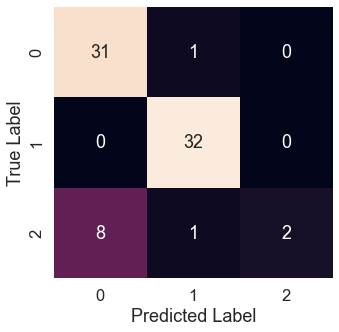

In [51]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
plot_conf_mat(y_test, y_preds)

### Classification Report

In [52]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        32
           1       0.94      1.00      0.97        32
           2       1.00      0.18      0.31        11

    accuracy                           0.87        75
   macro avg       0.91      0.72      0.72        75
weighted avg       0.89      0.87      0.83        75



In [53]:
gs_rf.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 10}

In [54]:
# create a new classifier with best params
clf = RandomForestClassifier(min_samples_leaf=1,
                             min_samples_split=8,
                             n_estimators=10)

### Cross Validated Accuracy

In [55]:
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.9035675675675676

## Other Evaluation metrics results in nan

### Cross Validated Precision

In [66]:
# cv_precision = cross_val_score(clf,
#                         X,
#                         y,
#                         cv=5,
#                         scoring='precision')
# cv_precision = np.mean(cv_precision)
# cv_precision

### Cross Validated Recall

In [59]:
# cv_recall = cross_val_score(clf,
#                         X,
#                         y,
#                         cv=5,
#                         scoring='recall')
# cv_recall = np.mean(cv_recall)
# cv_recall

### Cross Validated F1

In [63]:
# cv_f1 = cross_val_score(clf,
#                         X,
#                         y,
#                         cv=5,
#                         scoring='f1')
# cv_f1 = np.mean(cv_f1)
# cv_f1

# Accuracy Score is now 90%